Se planea hacer un modelo predictivo utilizando tecnicas de machine learning para la prediccion de:

La probabilidad de que ocurra un crimen en una zona específicada en la ciudad de Bucaramanga y la probabilidad de la modalidad del crimen.

Clasificar la zona en diferentes categorías de seguridad, como "Alta seguridad", "Moderada seguridad", "Baja seguridad", etc.



LIBRERIAS A USAR

In [2]:

# Pandas para manejo de datos
import pandas as pd


# MatplotLib para grafos
import matplotlib.pyplot as plt

# Seaborn para grafos
import seaborn as sns

# Numpy para manejo de datos
import numpy as np
from numpy import dtype
from scipy.sparse.csgraph import depth_first_tree

# MinMaxScaler para normalizacion de datos
from sklearn.preprocessing import MinMaxScaler

CARGAR DATOS

In [3]:
        # Url de los datos 
url = "https://drive.google.com/uc?id=1RoSzovZx4l6CixdVfJTt527_WfCFqPO4&export=download"

# Convertir a DataFrame con pandas
df = pd.read_csv(url)


EDA DE LA TABLA PRINCIPAL


///////////////////// TABLA ////////////////////////////////////

In [4]:

# Mostra el tipo de dato de cada columna
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135076 entries, 0 to 135075
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ORDEN                   135076 non-null  int64 
 1   ARMAS_MEDIOS            135076 non-null  object
 2   BARRIOS_HECHO           135076 non-null  object
 3   LATITUD                 135076 non-null  object
 4   LONGITUD                135076 non-null  object
 5   ZONA                    135076 non-null  object
 6   NOM_COMUNA              135076 non-null  object
 7   ANO                     135076 non-null  int64 
 8   MES                     135076 non-null  object
 9   DIA                     135076 non-null  int64 
 10  DIA_SEMANA              135076 non-null  object
 11  DESCRIPCION_CONDUCTA    135076 non-null  object
 12  CONDUCTA                135076 non-null  object
 13  CLASIFICACIONES DELITO  135076 non-null  object
 14  CURSO_DE_VIDA           135076 non-n

In [5]:
# Mostrar las primeras filas del DataFrame
df.head()


,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,"7,170,557,382","-73,135,108",URBANA,14. MORRORICO,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,05. ADULTEZ,UNION LIBRE,MASCULINO,A PIE,A PIE
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,"7,120,645,358","-7,312,605",URBANA,05. GARCÍA ROVIRA,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,04. JOVENES,SOLTERO,MASCULINO,A PIE,A PIE
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,"7,120,645,358","-7,312,605",URBANA,05. GARCÍA ROVIRA,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,04. JOVENES,SOLTERO,MASCULINO,A PIE,A PIE
3,4,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,"715,135,927","-73,145,704,583",URBANA,03. SAN FRANCISCO,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,05. ADULTEZ,CASADO,MASCULINO,A PIE,A PIE
4,5,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,"7,170,557,382","-73,135,108",URBANA,04. OCCIDENTAL,2010,01. ENERO,1,05. VIERNES,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,LESIONES NO FATALES,04. JOVENES,UNION LIBRE,MASCULINO,A PIE,A PIE


///////////////////// COLUMNAS ////////////////////////////////////


In [6]:
print(f"Categorias y recuento: \n",df.ARMAS_MEDIOS.value_counts())
print("Total de categorias: ",df.ARMAS_MEDIOS.unique().shape)
print("Recuento de valores: ", df.ARMAS_MEDIOS.value_counts().sum())

print("Valores nulos o no reportados:", df.ARMAS_MEDIOS.value_counts()['NO REPORTADO'])

Categorias y recuento: 
 ARMAS_MEDIOS
SIN EMPLEO DE ARMAS                   38265
CONTUNDENTES                          37023
ARMA BLANCA / CORTOPUNZANTE           21890
VEHICULO                              13419
ARMA DE FUEGO                          8947
MOTO                                   7919
LLAVE MAESTRA                          2500
NO REPORTADO                           2113
PALANCAS                               1078
ESCOPOLAMINA                            656
LLAMADA TELEFONICA                      278
PUNZANTES                               248
CORTANTES                               123
PERRO                                    84
REDES SOCIALES                           68
DIRECTA                                  65
ACIDO                                    51
BICICLETA                                45
MIXTA                                    45
LICOR ADULTERADO                         36
CORTOPUNZANTES                           33
GASES                                 

No se encuentran valores "nulos" o "no reportados" en la columna BARRIOS_HECHO y un total de 484 barrios

In [7]:
print(f"Categorias y recuento: \n",df.BARRIOS_HECHO.value_counts())
print("Total de categorias: ",df.BARRIOS_HECHO.unique().shape)
print("Recuento de valores: ", df.BARRIOS_HECHO.value_counts().sum())

Categorias y recuento: 
 BARRIOS_HECHO
CENTRO                11199
SAN FRANCISCO          5944
CABECERA DEL LLANO     5794
LA CONCORDIA           5078
PROVENZA               3447
                      ...  
CAMPO GALAN               1
EL CENTRO                 1
EL PROGRESO               1
VILLABEL                  1
CAMPESTRE                 1
Name: count, Length: 484, dtype: int64
Total de categorias:  (484,)
Recuento de valores:  135076


Se encuentran valores "nulos" en las columnas LATITUD y LONGITUD que aparecen como "xx.xxxx" y "yy.yyyy" respectivamente con un recuento total 6363 y un recuento total de 135076

In [8]:
print("Recuento categorias: ", df.LATITUD.value_counts())
print("Recuento de valores", df.LATITUD.value_counts().sum())
print("/////////////////////////////////////////////////////")
print("Recuento categorias: ", df.LONGITUD.value_counts())
print("Recuento de valores", df.LONGITUD.value_counts().sum())

Recuento categorias:  LATITUD
xx.xxxx          6363
7,178,045,669    1799
7,170,557,382    1375
7,144,371        1163
7,164,623,864    1073
                 ... 
7,104,305,234       1
7,102,639,059       1
7,103,315,112       1
7,127,396,841       1
7,175,989           1
Name: count, Length: 64429, dtype: int64
Recuento de valores 135076
/////////////////////////////////////////////////////
Recuento categorias:  LONGITUD
-yy.yyyy           6363
-73,130,224,418    1799
-73,135,108        1375
-73,128,085        1162
-73,139,140,529    1080
                   ... 
-73,146,044,535       1
-73,143,981,597       1
-73,116,606,589       1
-73,102,834,148       1
-73,130,875           1
Name: count, Length: 60106, dtype: int64
Recuento de valores 135076


Se encuentran valores "nulos" o "no reportados" en la columna ZONA

In [9]:
print(f"Categorias y recuento: \n",df.ZONA.value_counts())
print("Total de categorias: ",df.ZONA.unique().shape)
print("Recuento de valores: ", df.ZONA.value_counts().sum())

print("Valores nulos o no reportados:", df.ARMAS_MEDIOS.value_counts()['NO REPORTADO'])

Categorias y recuento: 
 ZONA
URBANA        131547
NO REPORTA      2189
RURAL           1183
OTROS            157
Name: count, dtype: int64
Total de categorias:  (4,)
Recuento de valores:  135076
Valores nulos o no reportados: 2113


Se encuentran valores "nulos" o "sin informacion" en la columna NOM_COMUNA

In [10]:
print(f"Categorias y recuento: \n",df.NOM_COMUNA.value_counts())
print("Total de categorias: ",df.NOM_COMUNA.unique().shape)
print("Recuento de valores: ", df.NOM_COMUNA.value_counts().sum())

#print("Valores nulos o no reportados:", df.ARMAS_MEDIOS.value_counts()['NO REPORTADO'])

Categorias y recuento: 
 NOM_COMUNA
03. SAN FRANCISCO         15875
15. CENTRO                13872
13. ORIENTAL              13606
12. CABECERA DEL LLANO    12835
01. NORTE                 12708
06. LA CONCORDIA           9994
05. GARCÍA ROVIRA          8959
04. OCCIDENTAL             7736
10. PROVENZA               6639
09. LA PEDREGOSA           4994
02. NOR ORIENTAL           4654
11. SUR                    4532
17. MUTIS                  4196
08. SUR OCCIDENTE          3419
14. MORRORICO              3290
07. LA CIUDADELA           3247
16. LAGOS DEL CACIQUE      3228
CORREGIMIENTO 1             577
CORREGIMIENTO 3             404
FLORIDABLANCA               121
CORREGIMIENTO 2             100
SIN INFORMACION              45
GIRON                        38
MEDELLIN                      3
PIEDECUESTA                   3
BARRANCABERMEJA               1
Name: count, dtype: int64
Total de categorias:  (26,)
Recuento de valores:  135076


Sin discrepancias en las fechas ni valores nulos, datos hasta el 2021

In [11]:
print("Recuento años:", df.ANO.value_counts())
print("Total años:", df.ANO.value_counts().sum())
print("/////////////////////////////////////")
print("Recuento meses:", df.MES.value_counts())
print("Total meses:", df.MES.value_counts().sum())
print("/////////////////////////////////////")
print("Recuento dias:", df.DIA.value_counts())
print("Total dias:", df.DIA.value_counts().sum())
print("/////////////////////////////////////")
print("Recuento dia de la semana:", df.DIA_SEMANA.value_counts())
print("Total dia de la semana:", df.DIA_SEMANA.value_counts().sum())

Recuento años: ANO
2016    13610
2018    13492
2019    12566
2017    12308
2021    11721
2012    10912
2015    10829
2013    10759
2011    10367
2014    10214
2020     9605
2010     8693
Name: count, dtype: int64
Total años: 135076
/////////////////////////////////////
Recuento meses: MES
10. OCTUBRE       11990
12. DICIEMBRE     11774
01. ENERO         11563
02. FEBRERO       11476
09. SEPTIEMBRE    11348
08. AGOSTO        11251
03. MARZO         11177
07. JULIO         11146
05. MAYO          11124
11. NOVIEMBRE     10781
04. ABRIL         10748
06. JUNIO         10698
Name: count, dtype: int64
Total meses: 135076
/////////////////////////////////////
Recuento dias: DIA
1     5097
10    4723
2     4588
5     4575
9     4556
3     4519
12    4495
15    4493
14    4492
4     4489
16    4485
22    4481
8     4455
23    4441
7     4436
17    4423
18    4413
20    4405
13    4399
6     4383
28    4376
11    4375
24    4353
27    4346
25    4308
21    4293
19    4275
26    4179
30    3967


Se encuentran valores "nulos" o "no reportados" en la columna DESCRIPCION_CONDUCTA con un total de 12 datos

In [12]:
print(f"Categorias y recuento: \n",df.DESCRIPCION_CONDUCTA.value_counts())
print("Total de categorias: ",df.DESCRIPCION_CONDUCTA.unique().shape)
print("Recuento de valores: ", df.DESCRIPCION_CONDUCTA.value_counts().sum())

print("Valores nulos o no reportados:", df.DESCRIPCION_CONDUCTA.value_counts()['NO REPORTA'])

Categorias y recuento: 
 DESCRIPCION_CONDUCTA
ARTÍCULO 239. HURTO A PERSONAS                                                                                     48452
ARTÍCULO 111. LESIONES PERSONALES                                                                                  24450
ARTÍCULO 120. LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )                                                       21128
ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR                                                                              16519
ARTÍCULO 239. HURTO A ENTIDADES COMERCIALES                                                                         8937
ARTÍCULO 239. HURTO A RESIDENCIAS                                                                                   4752
ARTÍCULO 239. HURTO A MOTOCICLETAS                                                                                  3708
ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS                                                          

Se encuentran valores "nulos" o "no reportados" en la columna CONDUCTA con un total de 12 datos y una discrepancia respecto a DESCRIPCION_CONDUCTA con un total de 41 categorias frente a 43

In [13]:
print(f"Categorias y recuento: \n",df.CONDUCTA.value_counts())
print("Total de categorias: ",df.CONDUCTA.unique().shape)
print("Recuento de valores: ", df.CONDUCTA.value_counts().sum())

print("Valores nulos o no reportados:", df.CONDUCTA.value_counts()['NO REPORTA'])

Categorias y recuento: 
 CONDUCTA
HURTO A PERSONAS                                                                                   48452
LESIONES PERSONALES                                                                                24450
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )                                                     21130
VIOLENCIA INTRAFAMILIAR                                                                            16519
HURTO A ENTIDADES COMERCIALES                                                                       8937
HURTO A RESIDENCIAS                                                                                 4752
HURTO A MOTOCICLETAS                                                                                3708
ACTOS SEXUALES CON MENOR DE 14 AÑOS                                                                 1529
HOMICIDIO                                                                                           1365
ACCESO CARNAL ABUSIVO

Se encuentran valores "nulos" o "no reportados" en la columna CLASIFICACIONES DELITO con un total de 12 datos

In [14]:
print(f"Categorias y recuento: \n",df['CLASIFICACIONES DELITO'].value_counts())
print("Total de categorias: ",df['CLASIFICACIONES DELITO'].unique().shape)
print("Recuento de valores: ", df['CLASIFICACIONES DELITO'].value_counts().sum())

print("Valores nulos o no reportados:", df['CLASIFICACIONES DELITO'].value_counts()['NO REPORTA'])

Categorias y recuento: 
 CLASIFICACIONES DELITO
LESIONES NO FATALES    128993
VIOLENCIA SEXUAL         4047
LESIONES FATALES         2024
NO REPORTA                 12
Name: count, dtype: int64
Total de categorias:  (4,)
Recuento de valores:  135076
Valores nulos o no reportados: 12


Se encuentran valores "nulos" o "no reportados" en la columna MOVIL_VICTIMA y MOVIL_AGRESOR con un total de 881 datos y 434 datos respectivamente

In [15]:
print(f"Categorias y recuento: \n",df.MOVIL_VICTIMA.value_counts())
print("Total de categorias: ",df.MOVIL_VICTIMA.unique().shape)
print("Recuento de valores: ", df.MOVIL_VICTIMA.value_counts().sum())

print("Valores nulos o no reportados:", df.MOVIL_VICTIMA.value_counts()['NO REPORTA'])

print("/////////////////////////////////////")

print(f"Categorias y recuento: \n",df.MOVIL_AGRESOR.value_counts())
print("Total de categorias: ",df.MOVIL_AGRESOR.unique().shape)
print("Recuento de valores: ", df.MOVIL_AGRESOR.value_counts().sum())

print("Valores nulos o no reportados:", df.MOVIL_AGRESOR.value_counts()['NO REPORTA'])

Categorias y recuento: 
 MOVIL_VICTIMA
A PIE                    104797
CONDUCTOR MOTOCICLETA     16915
CONDUCTOR VEHICULO         5457
PASAJERO BUS               1877
PASAJERO MOTOCICLETA       1250
BICICLETA                  1126
CONDUCTOR TAXI             1108
NO REPORTA                  881
PASAJERO TAXI               795
PASAJERO VEHICULO           471
CONDUCTOR BUS               279
PASAJERO METRO              117
PASAJERO AERONAVE             2
PASAJERO BARCO                1
Name: count, dtype: int64
Total de categorias:  (14,)
Recuento de valores:  135076
Valores nulos o no reportados: 881
/////////////////////////////////////
Categorias y recuento: 
 MOVIL_AGRESOR
A PIE                    93438
CONDUCTOR MOTOCICLETA    15067
CONDUCTOR VEHICULO       13022
PASAJERO MOTOCICLETA      7339
CONDUCTOR TAXI            2931
PASAJERO BUS              1547
PASAJERO TAXI              569
NO REPORTA                 434
BICICLETA                  366
PASAJERO VEHICULO          185
PASAJERO

FEATURE ENGINEERING


///////////////////// ELIMINACION COLUMNAS ////////////////////////////////////

Se eliminan las columnas ESTADO_CIVIL_PERSONA, CURSO_DE_VIDA, GENERO, ZONA por falta de aportar informacion relevante para el modelo
y se elimina la columna CONDUCTA por redundancia con la columna DESCRIPCION_CONDUCTA y una discrepancia en los datos

Tambien se elimina NOM_COMUNA por poder obtenerse la misma informacion de la columna BARRIOS_HECHO

In [16]:
df_normalizada = df

In [17]:


df_normalizada = df_normalizada.drop(['ESTADO_CIVIL_PERSONA', 'CURSO_DE_VIDA', 'GENERO', 'CONDUCTA', 'ZONA', 'NOM_COMUNA', 'ORDEN'], axis=1)

///////////////////// RENOMBRAR COLUMNAS ////////////////////////////////////

In [18]:
df_normalizada = df_normalizada.rename(columns={'CLASIFICACIONES DELITO': 'CLASIFICACIONES_DELITO'})

///////////////////// TRANSFORMACION DATOS Y COLUMNAS //////////////////////////////////

Se tranforman las columnas ANO, MES, DIA, DIA_SEMANA a una columna llamada FECHA_HECHO con el formato YYYY-MM-DD

Primero se transforma el mes a su equivalente numerico mapeando cada uno de los meses a un numero del 1 al 12

Luego se crea la columna FECHA_TEMP concatenando las columnas ANO, MES_NUM y DIA y se convierte a tipo datetime en una nueva columna llamada FECHA_HECHO

Y se eliminan las columnas ANO, MES, DIA y FECHA_TEMP

En base a FECHA_HECHO se sacan las columnas numericas de ANO, MES y DIA para el posterior entrenamiento

In [19]:
mes_mapping = {
    "01. ENERO": 1, "02. FEBRERO": 2, "03. MARZO": 3, "04. ABRIL": 4,
    "05. MAYO": 5, "06. JUNIO": 6, "07. JULIO": 7, "08. AGOSTO": 8,
    "09. SEPTIEMBRE": 9, "10. OCTUBRE": 10, "11. NOVIEMBRE": 11, "12. DICIEMBRE": 12
}
df_normalizada['MES_NUM'] = df['MES'].map(mes_mapping)

In [20]:
df_normalizada['FECHA_TEMP'] = pd.to_datetime(df_normalizada['ANO'].astype(str) + '-' + df_normalizada['MES_NUM'].astype(str) + '-' + df_normalizada['DIA'].astype(str))

df_normalizada['FECHA_HECHO'] = pd.to_datetime(df_normalizada['FECHA_TEMP'], format='%Y-%m-%d', errors='coerce')


In [21]:
df_normalizada = df_normalizada.drop(['ANO', 'MES', 'DIA', 'FECHA_TEMP', 'MES_NUM'], axis=1)

In [22]:
df_normalizada['ANO'] = df_normalizada['FECHA_HECHO'].dt.year
df_normalizada['MES'] = df_normalizada['FECHA_HECHO'].dt.month
df_normalizada['DIA'] = df_normalizada['FECHA_HECHO'].dt.day

In [23]:
df_normalizada = df_normalizada.drop(['FECHA_HECHO'], axis=1)

Se tranforman las columnas LATITUD y LONGITUD a tipo float64 y se imputan los valores "xx.xxxx" y "yy.yyyy" que representan valores nulos con la media 
Y se aplica Min-Max Scaling a las columnas 'LATITUD' y 'LONGITUD' para normalizar los datos

In [24]:
# Se convierten las columnas LATITUD y LONGITUD a tipo float64
df_normalizada['LATITUD'] = pd.to_numeric(df_normalizada['LATITUD'].str.replace(',', ''), errors='coerce')
df_normalizada['LONGITUD'] = pd.to_numeric(df_normalizada['LONGITUD'].str.replace(',', ''), errors='coerce')

# Calcular la media de cada columna (ignorando los NaN)
latitud_mean = df_normalizada['LATITUD'].mean()
longitud_mean = df_normalizada['LONGITUD'].mean()

# Imputar los valores NaN con la media
df_normalizada['LATITUD'] = df_normalizada['LATITUD'].fillna(latitud_mean)
df_normalizada['LONGITUD'] = df_normalizada['LONGITUD'].fillna(longitud_mean)

In [25]:
# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar Min-Max Scaling a las columnas 'LATITUD' y 'LONGITUD'
df_normalizada[['LATITUD', 'LONGITUD']] = scaler.fit_transform(df_normalizada[['LATITUD', 'LONGITUD']])

///////////////////// NORMALIZACION DE DATOS ////////////////////////////////////

Se aplica one-hot encoding a las columnas ARMAS_MEDIOS, BARRIOS_HECHO, DIA_SEMANA, DESCRIPCION_CONDUCTA, CLASIFICACIONES DELITO, MOVIL_AGRESOR, MOVIL_VICTIMA

In [26]:
df_normalizada = pd.get_dummies(df_normalizada, columns=[
    'ARMAS_MEDIOS',
    'BARRIOS_HECHO',
    'DIA_SEMANA',
    'DESCRIPCION_CONDUCTA',
    'CLASIFICACIONES_DELITO',
    'MOVIL_AGRESOR',
    'MOVIL_VICTIMA'
], drop_first=True)



EDA TABLA NORMALIZADA

In [27]:
df_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135076 entries, 0 to 135075
Columns: 607 entries, LATITUD to MOVIL_VICTIMA_PASAJERO VEHICULO
dtypes: bool(602), float64(2), int32(3)
memory usage: 81.2 MB


In [39]:
df_normalizada.head()

,LATITUD,LONGITUD,ANO,MES,DIA,ARMAS_MEDIOS_AGUA CALIENTE,ARMAS_MEDIOS_ALUCINOGENOS,ARMAS_MEDIOS_ARMA BLANCA / CORTOPUNZANTE,ARMAS_MEDIOS_ARMA DE FUEGO,ARMAS_MEDIOS_ARMA TRAUMATICA,...,MOVIL_VICTIMA_PASAJERO AERONAVE,MOVIL_VICTIMA_PASAJERO BARCO,MOVIL_VICTIMA_PASAJERO BUS,MOVIL_VICTIMA_PASAJERO METRO,MOVIL_VICTIMA_PASAJERO MOTOCICLETA,MOVIL_VICTIMA_PASAJERO TAXI,MOVIL_VICTIMA_PASAJERO VEHICULO,BARRIO,TOTAL_INCIDENTES,CATEGORIA_SEGURIDAD
0,1.002491e-07,1.00000,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,BUENOS AIRES,588,Alta seguridad
1,9.955130e-08,1.00000,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,CAMPO HERMOSO,2784,Moderada seguridad
2,9.955130e-08,1.00000,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,CAMPO HERMOSO,2784,Moderada seguridad
3,9.998071e-09,0.99999,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,COMUNEROS,2235,Moderada seguridad
4,1.002491e-07,1.00000,2010,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,GIRARDOT,2608,Moderada seguridad


In [36]:
df_normalizada.value_counts('CATEGORIA_SEGURIDAD')

CATEGORIA_SEGURIDAD
Moderada seguridad    35362
Alta seguridad        34155
Baja seguridad        31462
Name: count, dtype: int64

In [57]:
df_normalizada.BARRIO.value_counts()

BARRIO
CENTRO                11199
SAN FRANCISCO          5944
CABECERA DEL LLANO     5794
LA CONCORDIA           5078
PROVENZA               3447
                      ...  
CAMPO GALAN               1
EL CENTRO                 1
EL PROGRESO               1
VILLABEL                  1
CAMPESTRE                 1
Name: count, Length: 483, dtype: int64

In [35]:
df_normalizada['TOTAL_INCIDENTES'].describe()


count    135076.000000
mean       2685.199754
std        3064.885586
min           1.000000
25%         536.000000
50%        1698.000000
75%        3441.000000
max       11199.000000
Name: TOTAL_INCIDENTES, dtype: float64

In [56]:
df_normalizada['TOTAL_INCIDENTES'].value_counts()

TOTAL_INCIDENTES
11199    11199
5944      5944
5794      5794
5078      5078
3447      3447
         ...  
29          29
14          28
26          26
6           24
22          22
Name: count, Length: 222, dtype: int64

FEATURE ENGINEERING PARA LA TABLA NORMALIZADA

In [33]:
barrios_columns = df_normalizada.filter(like='BARRIOS_HECHO_').columns
df_normalizada['BARRIO'] = df_normalizada[barrios_columns].idxmax(axis=1).str.replace('BARRIOS_HECHO_', '')


# Contar el número de incidentes por barrio
incidentes_por_barrio = df_normalizada['BARRIO'].value_counts().reset_index()
incidentes_por_barrio.columns = ['BARRIO', 'TOTAL_INCIDENTES']

# Unir este conteo de incidentes con el DataFrame original
df_normalizada = df_normalizada.merge(incidentes_por_barrio, on='BARRIO', how='left')

# Crear la columna CATEGORIA_SEGURIDAD basada en los umbrales de incidentes
df_normalizada['CATEGORIA_SEGURIDAD'] = pd.cut(df_normalizada['TOTAL_INCIDENTES'],
                                               bins=[536, 1698, 3441, float('inf')],
                                               labels=['Alta seguridad', 'Moderada seguridad', 'Baja seguridad'])

# Verificar los primeros resultados
df_normalizada[['BARRIO', 'TOTAL_INCIDENTES', 'CATEGORIA_SEGURIDAD']].head()






,BARRIO,TOTAL_INCIDENTES,CATEGORIA_SEGURIDAD
0,BUENOS AIRES,588,Alta seguridad
1,CAMPO HERMOSO,2784,Moderada seguridad
2,CAMPO HERMOSO,2784,Moderada seguridad
3,COMUNEROS,2235,Moderada seguridad
4,GIRARDOT,2608,Moderada seguridad


<Axes: ylabel='Frequency'>

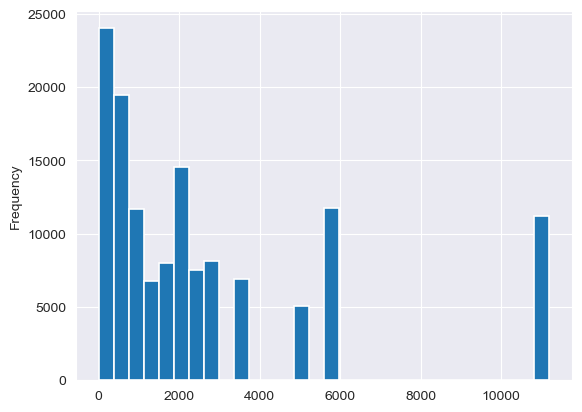

In [63]:
df_normalizada.TOTAL_INCIDENTES.plot.hist(bins=30, edgecolor='white', linewidth=1.2)